In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(24.445498603821363, 173.96579470255438),
 (-79.06239971570912, -115.73532115472406),
 (22.917245705197757, 25.690872291926922),
 (79.56969127961798, 166.55804685874512),
 (-51.610799567804165, -36.016129499696916),
 (-75.58281350707811, 101.77004109208735),
 (-20.57392828282022, 86.01545851640913),
 (33.38180005328428, 71.22283497179282),
 (42.19008970632402, -69.90705454155122),
 (-71.15760709168906, -34.448952536206434),
 (33.0294680866115, 10.735233653161686),
 (48.675221137774685, -147.98821646580228),
 (88.81409453985174, 177.16100837868254),
 (-25.21298554265401, -93.24608436664806),
 (-28.587657708782267, -22.886583804856514),
 (-40.84714721917714, 98.99488326707734),
 (14.64517587200234, -122.52442193025718),
 (86.13461287551354, -7.03676733430504),
 (40.29325662699176, 84.60441736234071),
 (-89.57304354400509, -65.39450501814161),
 (52.77089965790245, 40.263962514096846),
 (24.876269305163603, 8.439005612868925),
 (-36.46836491336666, 109.09756174627432),
 (-37.4453316579630

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | butaritari
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | asyut
Processing Record 4 of Set 13 | pevek
Processing Record 5 of Set 13 | chuy
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | bengkulu
Processing Record 8 of Set 13 | lachi
Processing Record 9 of Set 13 | brewster
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | tatawin
Processing Record 12 of Set 13 | kodiak
Processing Record 13 of Set 13 | leningradskiy
Processing Record 14 of Set 13 | pisco
Processing Record 15 of Set 13 | vila velha
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | constitucion
Processing Record 18 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 13 | korla
Processing Record 20 of Set 13 | ustye
Processing Record 21 of Set 13 | gat
Processing Record 22 of Set 13 | mahebourg
Pro

Processing Record 35 of Set 16 | lasa
Processing Record 36 of Set 16 | okhotsk
Processing Record 37 of Set 16 | saint-joseph
Processing Record 38 of Set 16 | nchelenge
Processing Record 39 of Set 16 | jacareacanga
Processing Record 40 of Set 16 | airai
Processing Record 41 of Set 16 | saint anthony
Processing Record 42 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 16 | ginir
Processing Record 44 of Set 16 | talnakh
Processing Record 45 of Set 16 | namibe
Processing Record 46 of Set 16 | nome
Processing Record 47 of Set 16 | chokurdakh
Processing Record 48 of Set 16 | vitim
Processing Record 49 of Set 16 | coquimbo
Processing Record 50 of Set 16 | kosonsoy
Processing Record 1 of Set 17 | fatehpur
Processing Record 2 of Set 17 | ayagoz
Processing Record 3 of Set 17 | high level
Processing Record 4 of Set 17 | castro
Processing Record 5 of Set 17 | buraydah
Processing Record 6 of Set 17 | banda aceh
Processing Record 7 of Set 17 | aswan
Processing Recor

Processing Record 23 of Set 20 | plettenberg bay
Processing Record 24 of Set 20 | gander
Processing Record 25 of Set 20 | krasnoye
Processing Record 26 of Set 20 | salalah
Processing Record 27 of Set 20 | balimo
City not found. Skipping...
Processing Record 28 of Set 20 | oranjemund
Processing Record 29 of Set 20 | saint-louis
Processing Record 30 of Set 20 | borogontsy
Processing Record 31 of Set 20 | torbat-e jam
Processing Record 32 of Set 20 | haines junction
Processing Record 33 of Set 20 | needham
Processing Record 34 of Set 20 | kuhestan
City not found. Skipping...
Processing Record 35 of Set 20 | bubaque
Processing Record 36 of Set 20 | nacimiento
Processing Record 37 of Set 20 | biltine
Processing Record 38 of Set 20 | masakin
Processing Record 39 of Set 20 | saldanha
Processing Record 40 of Set 20 | grand gaube
Processing Record 41 of Set 20 | matamoros
Processing Record 42 of Set 20 | dire
Processing Record 43 of Set 20 | uyuni
Processing Record 44 of Set 20 | talaja
Process

Processing Record 8 of Set 24 | solnechnyy
Processing Record 9 of Set 24 | mandiana
Processing Record 10 of Set 24 | mangile
City not found. Skipping...
Processing Record 11 of Set 24 | visp
Processing Record 12 of Set 24 | providencia
Processing Record 13 of Set 24 | sinegorye
Processing Record 14 of Set 24 | azimur
City not found. Skipping...
Processing Record 15 of Set 24 | yasothon
Processing Record 16 of Set 24 | hihifo
City not found. Skipping...
Processing Record 17 of Set 24 | pontianak
Processing Record 18 of Set 24 | raudeberg
Processing Record 19 of Set 24 | laguna
Processing Record 20 of Set 24 | log
Processing Record 21 of Set 24 | ajdabiya
Processing Record 22 of Set 24 | tongren
Processing Record 23 of Set 24 | byron bay
Processing Record 24 of Set 24 | sambava
Processing Record 25 of Set 24 | urengoy
Processing Record 26 of Set 24 | srandakan
Processing Record 27 of Set 24 | berdigestyakh
Processing Record 28 of Set 24 | sanski most
Processing Record 29 of Set 24 | soyo

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.36,78,74,15.90,KI,2022-03-10 00:38:14
1,Punta Arenas,-53.1500,-70.9167,50.11,76,75,12.66,CL,2022-03-10 00:34:25
2,Asyut,27.1810,31.1837,57.38,56,8,9.35,EG,2022-03-10 00:37:58
3,Pevek,69.7008,170.3133,19.26,74,11,10.87,RU,2022-03-10 00:38:14
4,Chuy,-33.6971,-53.4616,69.10,83,100,8.75,UY,2022-03-10 00:38:15
5,Albany,42.6001,-73.9662,33.82,91,100,2.08,US,2022-03-10 00:35:44
6,Bengkulu,-3.8004,102.2655,78.28,79,96,2.66,ID,2022-03-10 00:37:10
7,Lachi,33.3833,71.3386,54.14,50,46,3.56,PK,2022-03-10 00:38:15
8,Brewster,41.3973,-73.6171,34.74,94,100,3.00,US,2022-03-10 00:38:16
9,Ushuaia,-54.8000,-68.3000,47.86,76,40,10.36,AR,2022-03-10 00:38:16


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

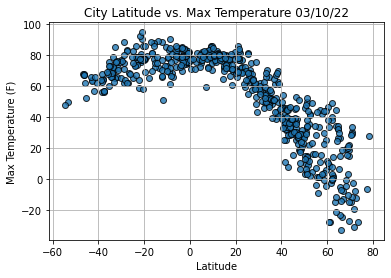

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

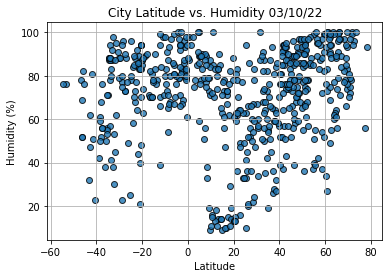

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

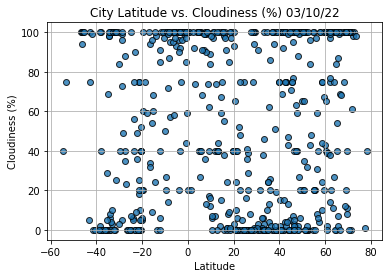

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

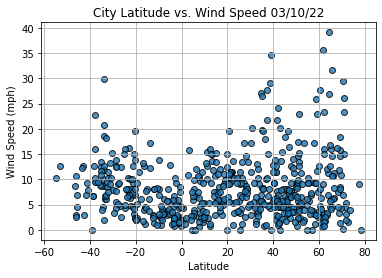

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.36,78,74,15.90,KI,2022-03-10 00:38:14
2,Asyut,27.1810,31.1837,57.38,56,8,9.35,EG,2022-03-10 00:37:58
3,Pevek,69.7008,170.3133,19.26,74,11,10.87,RU,2022-03-10 00:38:14
5,Albany,42.6001,-73.9662,33.82,91,100,2.08,US,2022-03-10 00:35:44
7,Lachi,33.3833,71.3386,54.14,50,46,3.56,PK,2022-03-10 00:38:15
...,...,...,...,...,...,...,...,...,...
569,Marzuq,14.4000,46.4667,64.38,14,59,5.37,YE,2022-03-10 00:53:19
570,Saint Leonard,47.1730,-67.9247,28.58,89,100,7.96,CA,2022-03-10 00:53:19
571,Semey,50.4111,80.2275,13.30,86,100,6.55,KZ,2022-03-10 00:53:19
572,Macomb,40.4592,-90.6718,32.85,76,0,9.22,US,2022-03-10 00:49:12


In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.36,78,74,15.90,KI,2022-03-10 00:38:14
2,Asyut,27.1810,31.1837,57.38,56,8,9.35,EG,2022-03-10 00:37:58
3,Pevek,69.7008,170.3133,19.26,74,11,10.87,RU,2022-03-10 00:38:14
5,Albany,42.6001,-73.9662,33.82,91,100,2.08,US,2022-03-10 00:35:44
7,Lachi,33.3833,71.3386,54.14,50,46,3.56,PK,2022-03-10 00:38:15


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

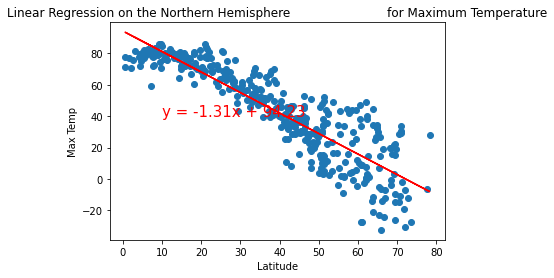

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

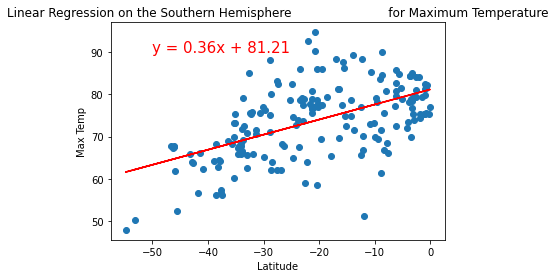

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

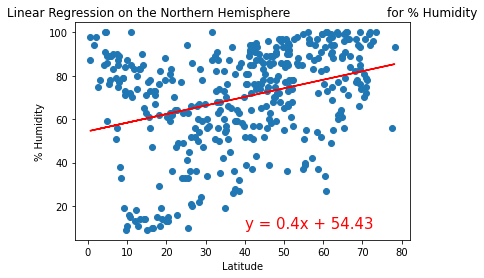

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

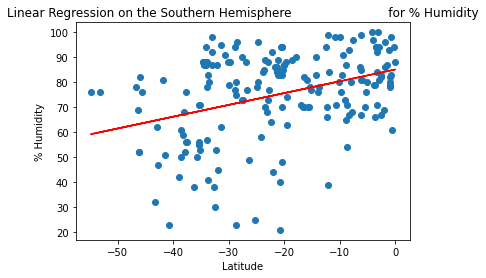

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

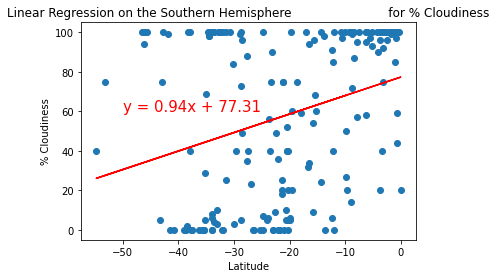

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

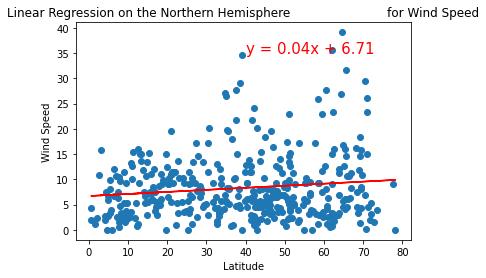

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

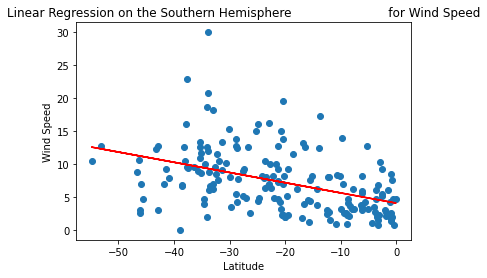

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))